## Step 1: Data Understanding and Preparation
By using *df.shape* we can see the full size of the dataset.  
By using *df.dtypes* we can see what data type the variables are.  

All variables are either objects or integers, including the days, months, duration, etc.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bank-full.csv", sep=";")
df = df.drop_duplicates()

print(df.shape)
print(df.dtypes)
df.head()

(45211, 17)
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Step 1.2: Data Cleaning

We are creating new variables just to test out the values inside the dataframe.  
By using *df.isnull()* we see that there are no blank values in the dataset.

By using *df=="unknown"* we see that the "education" column has 1857 blank values, along with the "job" column, having 288.  
We are choosing to keep these rows, and treat the unknown variable as its own category.

By using *df==0* we see that 36954 cells from the "previous" column are 0. This shows that the customer was not contacted previously.  
There are also 3514 cells from the "balance" column that are 0, but we won't remove these rows.

By using *df==-1* we see that the client was not previously contacted, in the "pdays" column.  
We will remove this "pdays" column as we do not think this is necessarily a good predictor, in comparison to the "previous" column.



In [23]:
df_null = (df.isnull()).sum()
print("This is how many values are empty:")
print(df_null)

df_unknown = (df == "unknown").sum()
print("This is how many values are unknown:")
print(df_unknown)

df_0 = (df == 0).sum()
print("This is how many values are 0:")
print(df_0)

df_1 = (df == "-1").sum()
print("This is how many values are -1:")
print(df_1)

This is how many values are empty:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
This is how many values are unknown:
age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64
This is how many values are 0:
age              0
job              0
marital          0
education        0
default          0
balance       3514
housing          0
loan             0
contact          0
day              0
month            0
duration         3
campaign         0
pdays            0
previous     36954
poutcome

We are removing the *"poutcome", "pdays", "contact"*, and the *"duration"* column.  
We are not removing any rows for now, since there are no blank values.


We dropped the *"duration"* column to prevent data leakage, ensuring the model we will create later predicts based only on information available before a call is made."

In [24]:
df.drop(columns=['poutcome', 'pdays', 'contact', 'duration'], inplace=True)
df = df.drop_duplicates().reset_index(drop=True) # Remove duplicates and reset index to make sure we have no leakage between train and test sets later.
print(df.shape)

(45190, 13)


### Step 1.3: Encoding Categorical Variables

We will print out the numerical and categorical columns so we see their data type.  
We are going to convert the categorical columns to numerical ones, so it can be easier to calculate.

In [25]:

print("Numerical columns:" , df.select_dtypes(include=np.number).columns)
print("")
print("Categorical columns:" , df.select_dtypes(include='object').columns)


Numerical columns: Index(['age', 'balance', 'day', 'campaign', 'previous'], dtype='object')

Categorical columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'y'],
      dtype='object')


#### One-Hot Encoding  
Categorical variables were converted to numeric using one-hot encoding, and the target variable was mapped to 0/1.  
This makes the dataset fully machine-readable for modeling.

In [26]:
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
df_encoded['y'] = df['y'].map({'no': 0, 'yes': 1})
df_encoded.head()

,age,balance,day,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,58,2143,5,1,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,0
1,44,29,5,1,0,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,0
2,33,2,5,1,0,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,0
3,47,1506,5,1,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,0
4,33,1,5,1,0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0


After encoding, all features are numeric, there are no missing values, and the dataset is fully machine readable for machine learning models.  
Now we are verifying that the encoded dataset is machine readable.

In [27]:
print(df_encoded.dtypes.unique()) # Only data types are integers and booleans
print(df_encoded.isnull().sum().sum()) # There are no null values
print(df_encoded.shape) # Now we have 45211 rows with 36 columns
pd.set_option('display.max_columns', None) 
df_encoded.head()

[dtype('int64') dtype('bool')]
0
(45190, 36)


,age,balance,day,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,58,2143,5,1,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,0
1,44,29,5,1,0,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,0
2,33,2,5,1,0,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,0
3,47,1506,5,1,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,0
4,33,1,5,1,0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0


### Step 1.4: Feature Scaling

In our dataset, numerical columns are the ones that hold meaningful numbers for the model.  
The function *select_dtypes(include= ['int64'])* is used to select all the numerical columns.  
We are using the function *.remove()* to remove the target variable for now.

In [28]:

numeric_cols = df_encoded.select_dtypes(include=['int64']).columns.tolist()
numeric_cols.remove('y')

print("Numeric features for scaling:", numeric_cols)


Numeric features for scaling: ['age', 'balance', 'day', 'campaign', 'previous']


We scale the numeric columns using StandardScaler.  
This puts all numbers on the same scale so the model doesn’t favor features just because they have bigger values.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

pd.set_option('display.max_columns', None)
df_encoded.head()

,age,balance,day,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,1.606741,0.256164,-1.29828,-0.569367,-0.252003,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,0
1,0.288408,-0.438021,-1.29828,-0.569367,-0.252003,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,0
2,-0.747426,-0.446887,-1.29828,-0.569367,-0.252003,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,0
3,0.570907,0.046989,-1.29828,-0.569367,-0.252003,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,0
4,-0.747426,-0.447216,-1.29828,-0.569367,-0.252003,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0


### Step 1.5: Outlier Handling.
*Detecting outliers using the IQR method*  

We calculate the IQR (Interquartile Range) and define lower/upper bounds.  
Values outside these bounds are considered outliers.

In [30]:
Q1 = df_encoded[numeric_cols].quantile(0.25)
Q3 = df_encoded[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df_encoded[numeric_cols] < lower_bound) | (df_encoded[numeric_cols] > upper_bound)).sum()
print("Number of outliers per column:\n", outliers)


Number of outliers per column:
 age          487
balance     4733
day            0
campaign    3063
previous    8257
dtype: int64


##### We can either keep, cap, or remove outliers depending on their importance and effect on the model.  
##### We decided to keep *'age'*, and *'day'* as is.    
For the DAY column, there are 0 outliers. We keep all values since all days are valid and there’s nothing extreme.  
For the AGE column, there are 344 outliers. We keep them because they represent very young or very old clients, which are real and meaningful data.

##### We decided to cap extremes for *'balance'*, and *'campaign'*.  
For column BALANCE there are 3318 outliers. We cap these extreme values using Winsorization. Some clients have extremely high or very low balances, which could skew the model.  
For CAMPAIGN column there are 3031 outliers. We cap the extreme values because some clients were contacted many times during the campaign, and these extremes could skew the model.

##### We decided to keep 'previous' mostly as-is because zeros are meaningful.

In [31]:
#Applying outlier treatment consistently

from scipy.stats.mstats import winsorize
df_encoded['balance'] = winsorize(df_encoded['balance'], limits=[0.05, 0.05])
df_encoded['balance'] = winsorize(df_encoded['balance'], limits=[0.05, 0.05])

df_encoded['campaign'] = winsorize(df_encoded['campaign'], limits=[0.05, 0.05])
df_encoded['campaign'] = winsorize(df_encoded['campaign'], limits=[0.05, 0.05])

pd.set_option('display.max_columns', None)
df_encoded.head()

,age,balance,day,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,1.606741,0.256164,-1.29828,-0.569367,-0.252003,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,0
1,0.288408,-0.438021,-1.29828,-0.569367,-0.252003,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,0
2,-0.747426,-0.446887,-1.29828,-0.569367,-0.252003,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,0
3,0.570907,0.046989,-1.29828,-0.569367,-0.252003,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,0
4,-0.747426,-0.447216,-1.29828,-0.569367,-0.252003,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0


## STEP 2 : Exploratory Data Analysis 

### Target Variable Analysis

We want to review the 'y' column, and see what can affect that.  
First, let's start with a simple bar plot.

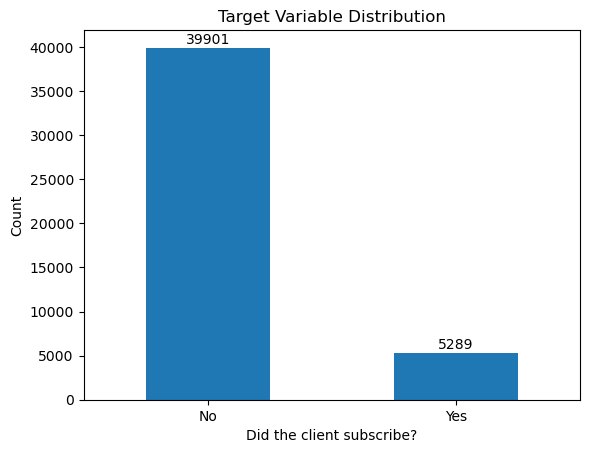

In [32]:
target = df_encoded['y'].value_counts()

ax = target.plot(kind="bar")
plt.title("Target Variable Distribution")
plt.xlabel("Did the client subscribe?")
plt.xticks(ticks=[0,1], labels=["No", "Yes"], rotation=0)
ax.bar_label(ax.containers[0], padding = 1)
plt.ylabel("Count")
plt.show()

From the plot above, we can see that there is a massive imbalance between the Yes and No.  
Let's display this in a percentage form as well, and with a pie plot too.

88.3% of clients said No, and 11.7% of clients said Yes.


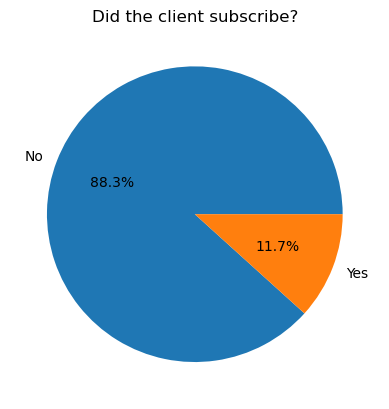

In [33]:
target_percentage = df_encoded['y'].value_counts(normalize=True) * 100
print(f"{target_percentage[0]:.1f}% of clients said No, and {target_percentage[1]:.1f}% of clients said Yes.")

target_percentage.plot(kind="pie", labels=["No", "Yes"], autopct='%1.1f%%')
plt.title("Did the client subscribe?")
plt.ylabel("")
plt.show()


### Step 2.2: EDA With Response Overlay

We will start with some bar plots for some categorical columns, that we believe might show a relationship between the predictor and the target variable.
We can do this by creating contingency tables with the predictors and the target.  
The predictors that we chose are: "job", "education", "housing", and "loan".  
The plots that we will build will also be normalized, so that the plot will be easier to comprehend.

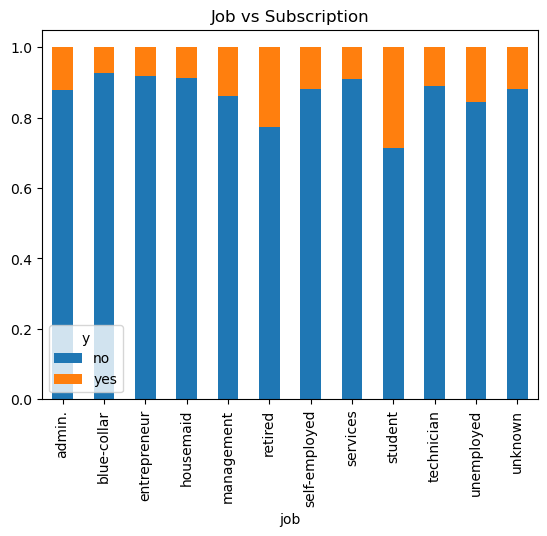

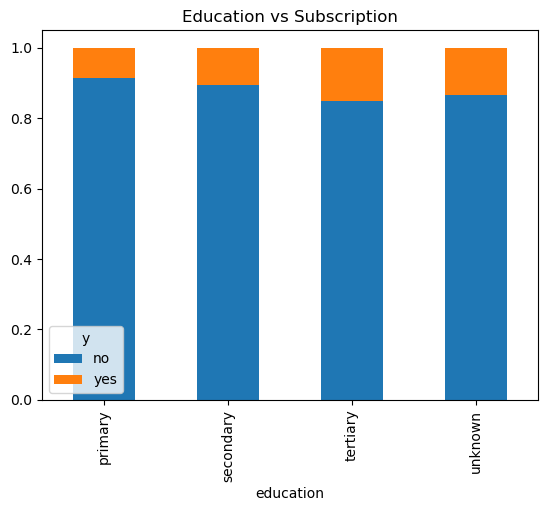

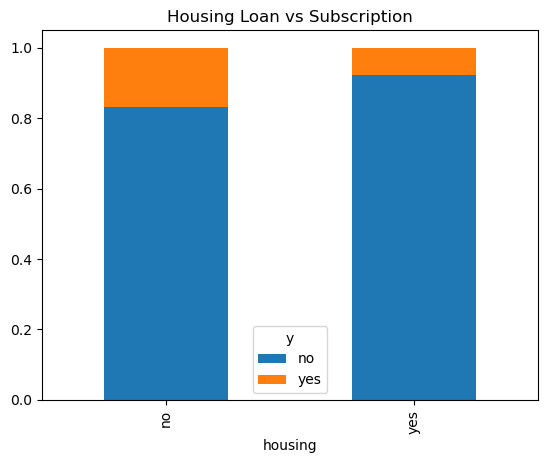

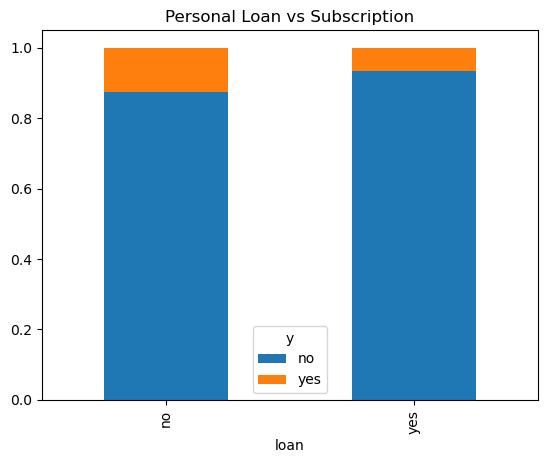

In [34]:
#We first create all the contingency tables
job_y = pd.crosstab(df["job"], df["y"])
education_y = pd.crosstab(df['education'], df['y'])
housing_y = pd.crosstab(df['housing'], df['y'])
loan_y = pd.crosstab(df['loan'], df['y'])

#Turning the tables into a rated form, by percentages (decimals)
job_y_rate = job_y.div(job_y.sum(1), axis=0)
education_y_rate = education_y.div(education_y.sum(1),axis=0)
housing_y_rate = housing_y.div(housing_y.sum(1), axis = 0)
loan_y_rate = loan_y.div(loan_y.sum(1), axis=0)

job_y_rate.plot(kind="bar", stacked=True)
plt.title("Job vs Subscription")
plt.show()

education_y_rate.plot(kind="bar", stacked=True)
plt.title("Education vs Subscription")
plt.show()

housing_y_rate.plot(kind="bar", stacked=True)
plt.title("Housing Loan vs Subscription")
plt.show()

loan_y_rate.plot(kind="bar", stacked=True)
plt.title("Personal Loan vs Subscription")
plt.show()

Based on the shown bar plots, we can say that... (e shohim pastaj se pertoj im tired 🚬)

Now we can create some histogram plots for some numerical columns as well, that we believe can affect if a client says yes or no.  
The columns we chose are "age", "balance", "campaign", and "previous".  
  
For this, we will use Seaborn, since this will handle the overlay logic for our target.

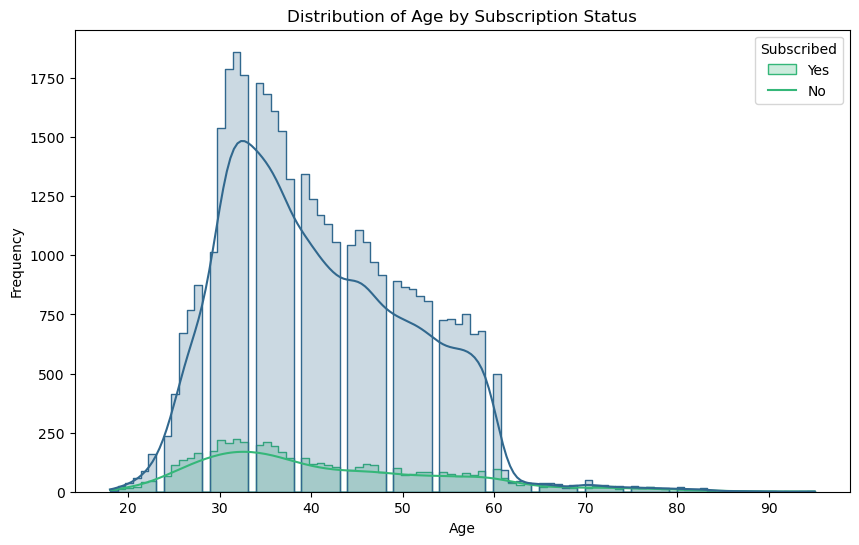

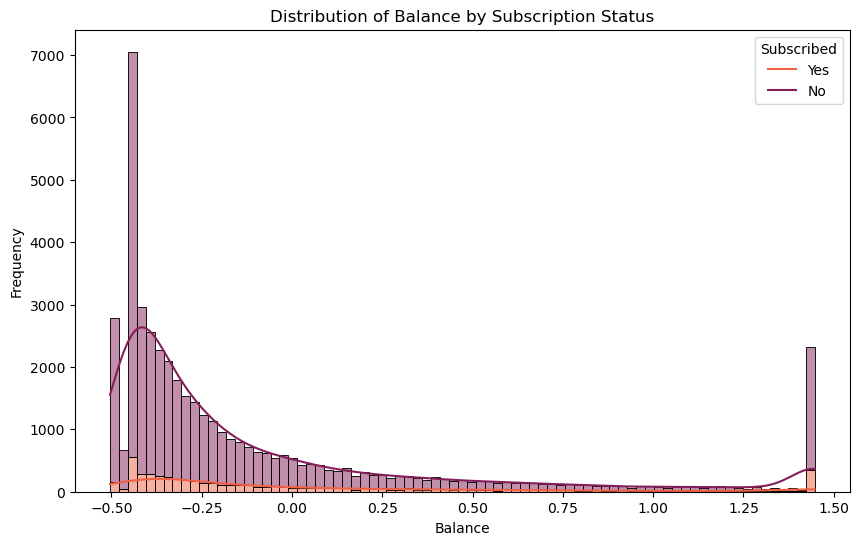

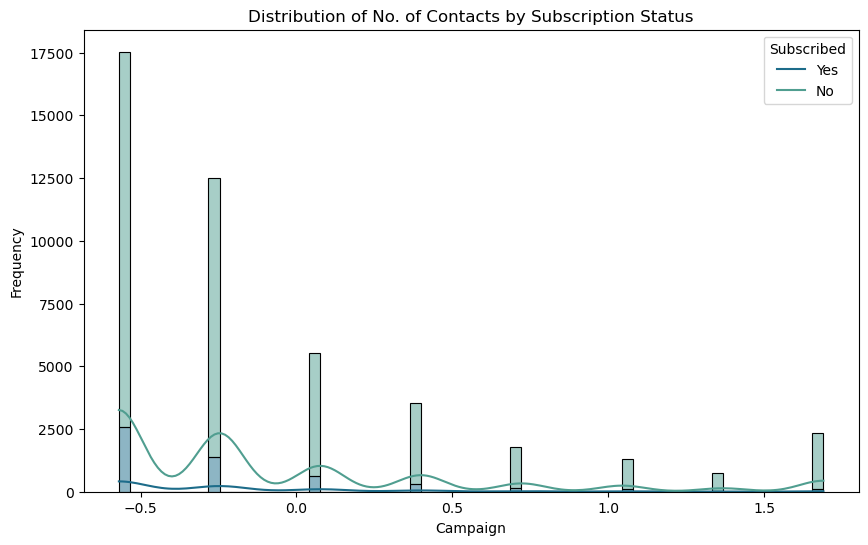

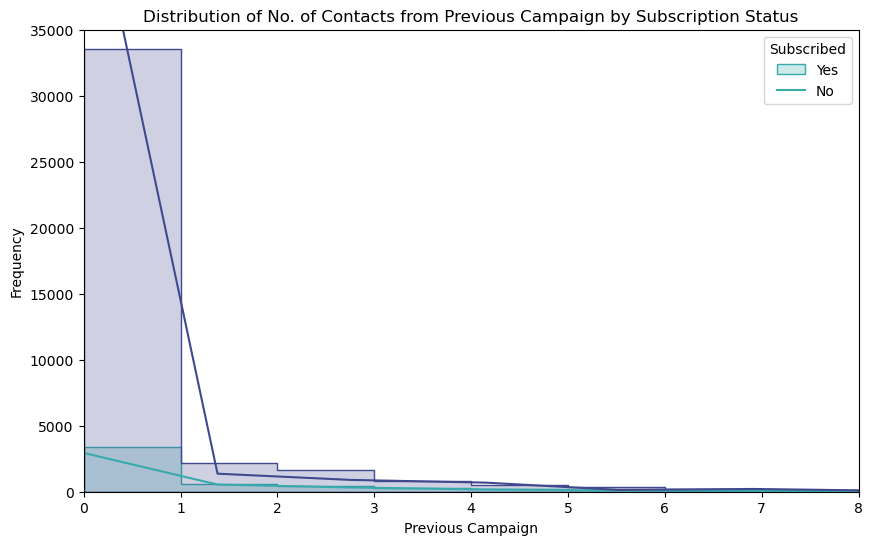

In [35]:
#For Age

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="age", hue="y", kde=True, element="step", palette="viridis")
plt.title("Distribution of Age by Subscription Status")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(title="Subscribed", labels=["Yes", "No"])
plt.show()

#For Balance

plt.figure(figsize=(10,6))
sns.histplot(data=df_encoded, x="balance", hue=df_encoded['y'], kde=True, multiple="stack", palette="rocket")
plt.title("Distribution of Balance by Subscription Status")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.legend(title="Subscribed", labels=["Yes", "No"])
plt.show()

#For Campaign

plt.figure(figsize=(10,6))
sns.histplot(data=df_encoded, x="campaign", hue=df_encoded['y'], kde=True, multiple="stack", palette="crest")
plt.title("Distribution of No. of Contacts by Subscription Status")
plt.xlabel("Campaign")
plt.ylabel("Frequency")
plt.legend(title="Subscribed", labels=["Yes", "No"])
plt.show()

#For Previous

plt.figure(figsize=(10,6))  # Fix bins
sns.histplot(data=df, x="previous", hue="y", kde=True, element="step", palette="mako", bins=range(0, 10))
plt.xlim(0, 8)
plt.ylim(0, 35000)
plt.title("Distribution of No. of Contacts from Previous Campaign by Subscription Status")
plt.xlabel("Previous Campaign")
plt.ylabel("Frequency")
plt.legend(title="Subscribed", labels=["Yes", "No"])
plt.show()


Based on the shown histogram plots, we can say that... (e shohim pastaj se pertoj im tired 🚬)

...here we wil continue yapping about what the graphs show and analyzing which features influence subscription

### STEP 3: Setup Phase
#### STEP 3.1: Train/Test split

We are splitting our dataset into two, one part for training (70%) and the other for testing (30%).  
We will use the testing part only in the end.

In [36]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (31633, 35)
Test set shape: (13557, 35)


#### STEP 3.2: Check Randomness
In the code above, we added *stratify* as an attribute, to ensure we have randomness.  
We can check it like this:

In [37]:
print("Proportion of 'yes' in Train:", y_train.mean())
print("Proportion of 'yes' in Test:", y_test.mean())

Proportion of 'yes' in Train: 0.11702968419056049
Proportion of 'yes' in Test: 0.11706129674706793


#### STEP 3.2: Validate the Data
We will check if we leaked any data by using sets

In [38]:
def row_hash(df_encoded):
    return pd.util.hash_pandas_object(df_encoded, index=False)

train_hash = set(row_hash(X_train))
test_hash = set(row_hash(X_test))

print("Train and Test:", len(train_hash & test_hash))

Train and Test: 18


We can see that there are 18 rows that are the same. That can be because of winsorizing and removing a very unique column, such as duration.  
So to make sure there won't be any leakage, we will remove these rows.

In [43]:
overlap_hashes = train_hash & test_hash

test_hashes_series = row_hash(X_test)
is_duplicate = test_hashes_series.isin(overlap_hashes)

X_test = X_test[~is_duplicate].reset_index(drop=True)
y_test = y_test[~is_duplicate].reset_index(drop=True)

print(f"Removed {is_duplicate.sum()} overlapping rows from Test set.")
print("New Train and Test overlap:", len(set(row_hash(X_train)) & set(row_hash(X_test))))

Removed 18 overlapping rows from Test set.
New Train and Test overlap: 0


#### STEP 3.3 Are the splits comparable?

In [45]:
num_cols = X_train.select_dtypes(include=[np.number]).columns

summary = pd.DataFrame({
    "train_mean": X_train[num_cols].mean(),
    "test_mean": X_test[num_cols].mean()
})

summary["max_diff"] = summary.max(axis=1) - summary.min(axis=1)
summary.sort_values("max_diff", ascending=False).head()

,train_mean,test_mean,max_diff
age,-0.005190,0.012160,0.017350
previous,0.001717,-0.003676,0.005392
campaign,-0.082875,-0.078346,0.004529
balance,-0.079336,-0.083612,0.004276
day,0.000834,-0.003072,0.003906


The max_diff column has quite negligible values, so we can confirm the splits are fine.

#### STEP 3.4: Establish Baseline Model Performance
Now we will see how a "dummy" that will always answer "no" see how good it is.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score

num_cols = X_train.select_dtypes(include=[np.number]).columns
cat_cols = [c for c in X_train.columns if c not in num_cols]

preprocess = ColumnTransformer(
    [("num", "passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)]
)

dummy = Pipeline([
    ("prep", preprocess),
    ("model", DummyClassifier(strategy="most_frequent"))
])

dummy.fit(X_train, y_train)
pred = dummy.predict(X_train) #Typically, we would use the validation set here. We'll just evaluate on the training set to see how the dummy model performs.

print("Dummy Accuracy:", accuracy_score(y_train, pred))
print("Dummy F1:", f1_score(y_train, pred))

Dummy Accuracy: 0.8829703158094395
Dummy F1: 0.0


This model is only ~88% accurate, because 88% of clients have said 'no'.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

baseline_lr = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=1000))
])

baseline_lr.fit(X_train, y_train)
pred = baseline_lr.predict(X_train)
proba = baseline_lr.predict_proba(X_train)[:, 1]

print(classification_report(y_train, pred))
print("ROC AUC:", roc_auc_score(y_train, proba))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     27931
           1       0.49      0.08      0.13      3702

    accuracy                           0.88     31633
   macro avg       0.69      0.53      0.53     31633
weighted avg       0.84      0.88      0.84     31633

ROC AUC: 0.7311504699558596


#### STEP 3.5: Balance the Training Set
We will balance the Training set to ensure that we will not have any issues with the model favoritizing 'no'.

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print(f"Before balancing: {y_train.value_counts()}")
print(f"After balancing: {y_train_bal.value_counts()}")

Before balancing: y
0    27931
1     3702
Name: count, dtype: int64
After balancing: y
0    27931
1    27931
Name: count, dtype: int64


### STEP 4: Creating the Models

We will be creating the models CART and Random Forest.  
But first, we must calculate the Baseline Accuracy:

In [40]:
baseline_accuracy = y_train.value_counts(normalize=True)[0]

print(f"Baseline Accuracy (Always predicting 'no'): {baseline_accuracy:.2%}")

Baseline Accuracy (Always predicting 'no'): 88.30%


Currently, our model is not useful because it has 0 Sensitivity, meaning that it can't catch any actual subscribers (yes responses).  
Let's start with the CART Model:

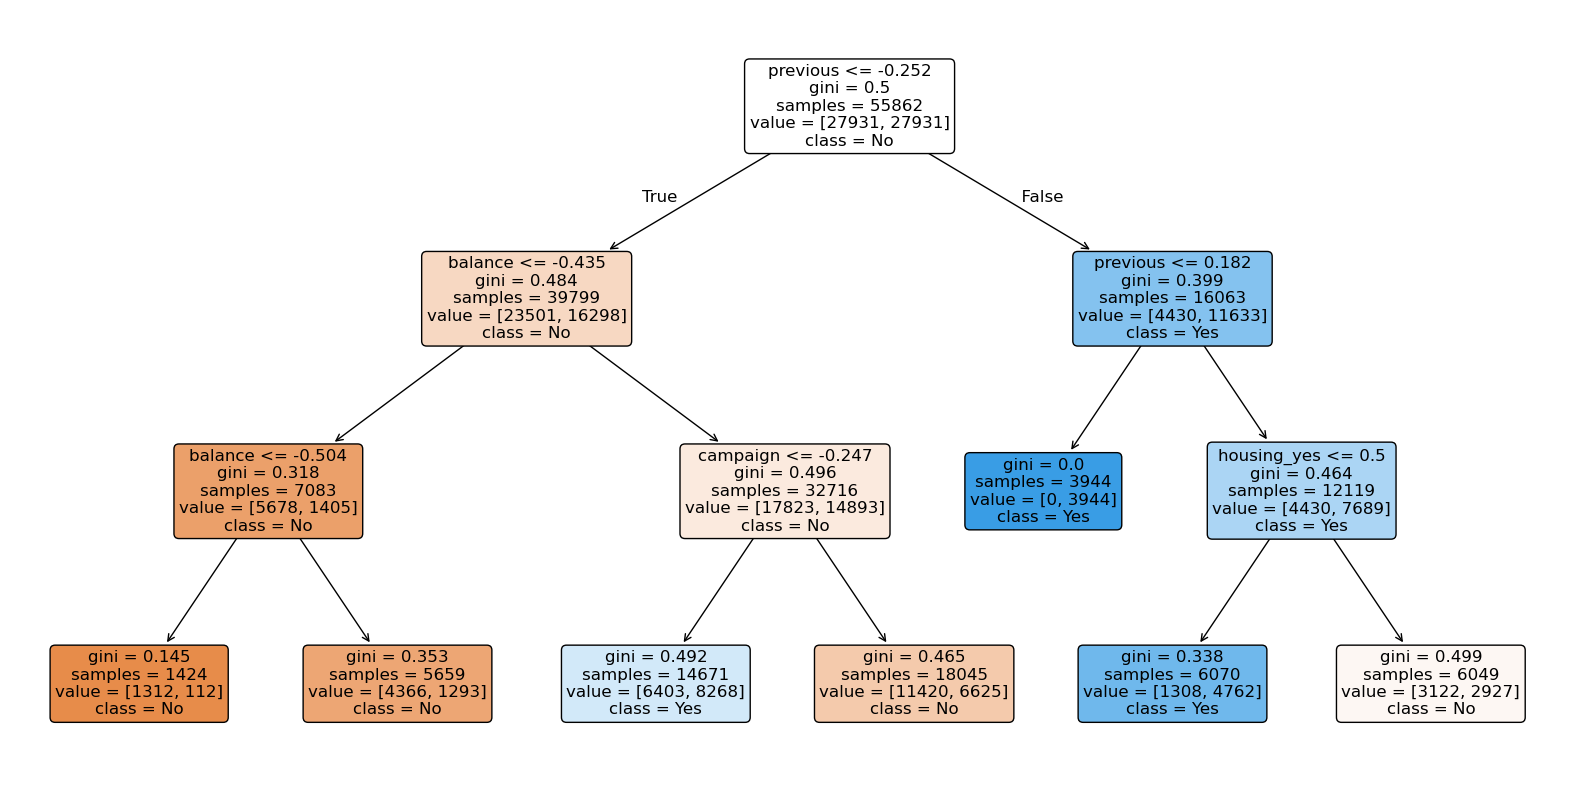

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

cart_tree = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)

cart_tree.fit(X_train_bal, y_train_bal)

plt.figure(figsize=(20,10))
plot_tree(cart_tree, 
          feature_names=X.columns, 
          class_names=['No', 'Yes'], 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.show()

Let's also create a Random Forest:

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

rf_model.fit(X_train_bal, y_train_bal)

rf_preds = rf_model.predict(X_test)